In [1]:
from sys import  path
path.append("../scratch")
import hackathon23_s1

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from funman import Funman
from funman.funman import FUNMANConfig
from funman.model import QueryLE
from funman.model.bilayer import BilayerDynamics, BilayerGraph, BilayerModel
from funman.model.query import QueryEncoded, QueryTrue
from funman.scenario import ConsistencyScenario, ConsistencyScenarioResult
from funman.scenario.scenario import AnalysisScenario


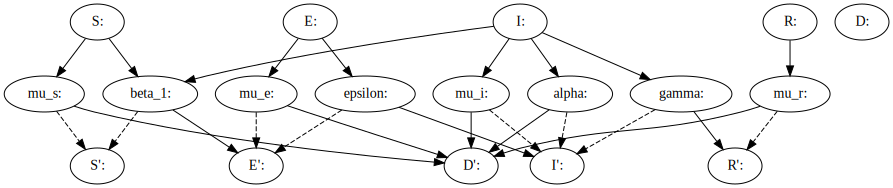

In [2]:
tc = hackathon23_s1.TestUseCases()
steps = 10
tc.iteration = 0
mu = [0.00008, 0.078, 0.19]
config = FUNMANConfig(max_steps=steps, solver="dreal")
bilayer = BilayerDynamics(json_graph=tc.initial_bilayer())
bilayer.to_dot()

Bounds: {'mu_s': [8e-05, 8e-05], 'mu_e': [8e-05, 8e-05], 'mu_i': [8e-05, 8e-05], 'mu_r': [8e-05, 8e-05], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 0: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 8e-05, 'mu_e': 8e-05, 'mu_i': 8e-05, 'mu_r': 8e-05, 'alpha': 0.006, 'epsilon': 0.33}
    index              E              R              S              I              D
0       0   1.000000e+02   0.000000e+00   4.998990e+05   1.000000e+00   0.000000e+00
1       1   3.749912e+05   1.250000e-01   1.249348e+05   3.386892e+01   4.000600e+01
2       2   3.424768e+06   4.358605e+00  -3.048629e+06   1.237765e+05   8.020601e+01
3       3  -2.830093e+11   1.547643e+04   2.830085e+11   1.237725e+06   8.628588e+02
4       4   2.627149e+17   1.701909e+05  -2.627149e+17  -9.339199e+10   8.329142e+03
5       5   1.840160e+28  -1.167383e+10  -1.840160e+28   8.669585e+16  -5.603436e+08
6       6  -1.196507e+45   1.083697e+16   1.196507e+45   6.072

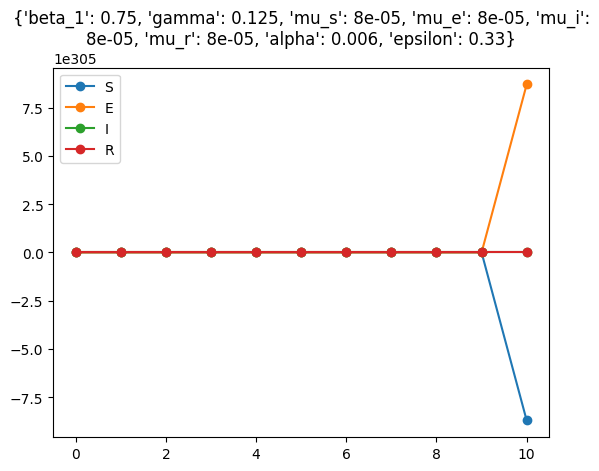

<Figure size 640x480 with 0 Axes>

In [3]:
###########################################################
# Unit Test 1, using Paper Parameters
###########################################################
testcase = 0
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: {tc.unit_test_1_bounds()}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

In [4]:
###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

Bounds: {'mu_s': [8e-05, 8e-05], 'mu_e': [8e-05, 8e-05], 'mu_i': [8e-05, 8e-05], 'mu_r': [8e-05, 8e-05], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 1: is inconsistent


In [5]:
###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(
        mu=mu[testcase],
        tolerance=3.0,
        relax=[
            # "mu_s",
            # "mu_e",
            # "mu_i",
            # "mu_r",
            # "beta_1",
            # "epsilon",
            "alpha",
            "gamma",
        ],
    ),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

Iteration 2: is inconsistent


Bounds: {'mu_s': [0.078, 0.078], 'mu_e': [0.078, 0.078], 'mu_i': [0.078, 0.078], 'mu_r': [0.078, 0.078], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 3: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 0.07800000000000001, 'mu_e': 0.07800000000000001, 'mu_i': 0.07800000000000001, 'mu_r': 0.07800000000000001, 'alpha': 0.006, 'epsilon': 0.33}
    index              E              R              S              I              D
0       0   1.000000e+02   0.000000e+00   4.998990e+05   1.000000e+00   0.000000e+00
1       1   3.749834e+05   1.250000e-01   8.598263e+04   3.379100e+01   3.900001e+04
2       2   2.401069e+06   4.339125e+00  -2.099803e+06   1.237713e+05   7.495821e+04
3       3  -1.949201e+11   1.547541e+04   1.949195e+11   8.902560e+05   1.088541e+05
4       4   1.301461e+17   1.255503e+05  -1.301460e+17  -6.432292e+10   1.447050e+05
5       5   6.278530e+27  -8.040249e+09  -6.278530e+27   4.294816e+16  -3.857651e+08
6     

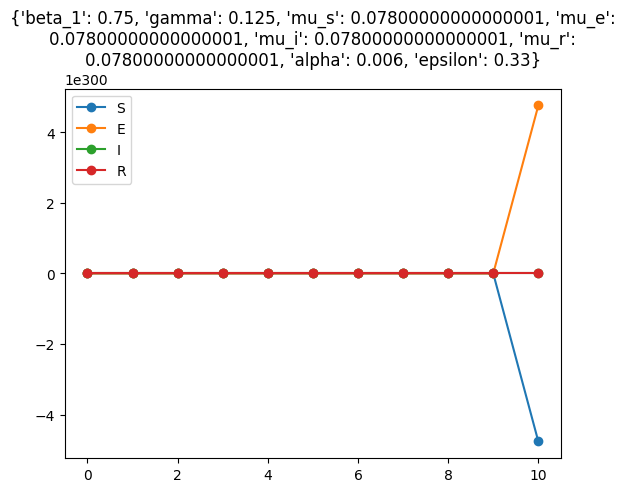

<Figure size 640x480 with 0 Axes>

In [6]:
###########################################################
# Unit Test 2, using Paper Parameters
###########################################################
testcase = 1
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

In [7]:
###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


Bounds: {'mu_s': [0.078, 0.078], 'mu_e': [0.078, 0.078], 'mu_i': [0.078, 0.078], 'mu_r': [0.078, 0.078], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 4: is inconsistent


In [8]:

###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(
        mu=mu[testcase],
        tolerance=3.0,
        relax=[
            # "mu_s",
            # "mu_e",
            # "mu_i",
            # "mu_r",
            # "beta_1",
            # "epsilon",
            "alpha",
            "gamma",
        ],
    ),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)



Iteration 5: is inconsistent


Bounds: {'mu_s': [0.19, 0.19], 'mu_e': [0.19, 0.19], 'mu_i': [0.19, 0.19], 'mu_r': [0.19, 0.19], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 6: {'beta_1': 0.75, 'gamma': 0.125, 'mu_s': 0.19, 'mu_e': 0.19, 'mu_i': 0.19, 'mu_r': 0.19, 'alpha': 0.006, 'epsilon': 0.33}
    index              E              R              S              I              D
0       0   1.000000e+02   0.000000e+00   4.998990e+05   1.000000e+00   0.000000e+00
1       1   3.749722e+05   1.250000e-01   2.999394e+04   3.367900e+01   9.500001e+04
2       2   9.376111e+05   4.311125e+00  -7.333293e+05   1.237637e+05   1.719502e+05
3       3  -6.806922e+10   1.547396e+04   6.806908e+10   3.934472e+05   2.350222e+05
4       4   2.008616e+16   6.171481e+04  -2.008614e+16  -2.246258e+10   2.877287e+05
5       5   3.383898e+26  -2.807772e+09  -3.383898e+26   6.628417e+15  -1.344474e+08
6       6  -1.682241e+42   8.285499e+14   1.682241e+42   1.116686e+26   3.

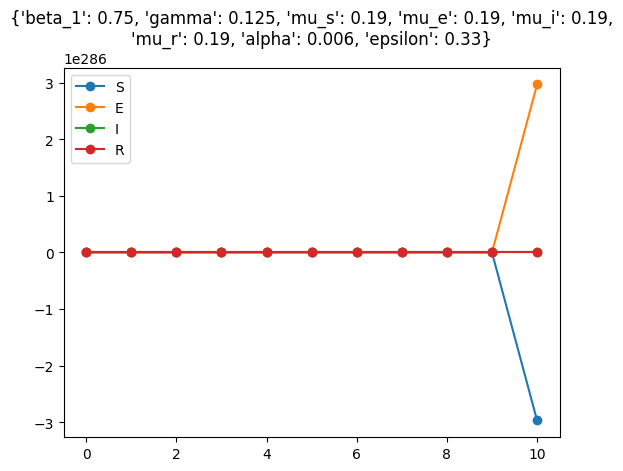

<Figure size 640x480 with 0 Axes>

In [9]:
###########################################################
# Unit Test 3, using Paper Parameters
###########################################################
testcase = 2
# print("Dynamics + simA params + well formed ...")
print(f"Bounds: { tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


In [10]:

###########################################################
# The basic constraints are satisfied, but output diverges,
# need to check that population is consistent (doesn't exceed N)
# Generate results using any parameters
###########################################################
print(f"Bounds: {tc.unit_test_1_bounds(mu=mu[testcase])}")
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    tc.unit_test_1_bounds(mu=mu[testcase]),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)


Bounds: {'mu_s': [0.19, 0.19], 'mu_e': [0.19, 0.19], 'mu_i': [0.19, 0.19], 'mu_r': [0.19, 0.19], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.006, 0.006], 'gamma': [0.125, 0.125]}
Iteration 7: is inconsistent


In [17]:
###########################################################
# Basic constraints are not satisfied, so relax them
###########################################################
bounds = tc.unit_test_1_bounds(
        mu=mu[testcase],
        tolerance=3.0,
        relax=[
            # "mu_s",
            # "mu_e",
            # "mu_i",
            # "mu_r",
            # "beta_1",
            # "epsilon",
            "alpha",
            "gamma",
        ]
    )
print(bounds)
scenario = tc.make_scenario(
    bilayer,
    tc.initial_state(),
    bounds,
    # tc.unit_test_1_bounds(
    #     mu=mu[testcase],
    #     tolerance=3.0,
    #     relax=[
    #         # "mu_s",
    #         # "mu_e",
    #         # "mu_i",
    #         # "mu_r",
    #         # "beta_1",
    #         # "epsilon",
    #         "alpha",
    #         "gamma",
    #     ]
    # ),
    tc.identical_parameters(),
    steps,
    tc.unit_test_1_well_behaved_query(steps, tc.initial_state()),
)
result_sat = Funman().solve(scenario, config=config)
tc.report(result_sat)

{'mu_s': [0.19, 0.19], 'mu_e': [0.19, 0.19], 'mu_i': [0.19, 0.19], 'mu_r': [0.19, 0.19], 'beta_1': [0.75, 0.75], 'epsilon': [0.33, 0.33], 'alpha': [0.0, 0.024], 'gamma': [0.0, 0.5]}
Iteration 9: is inconsistent
